In [2]:
from scipy.ndimage import convolve
from scipy import signal
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image = cv.imread('/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/images/human_face.png', cv.IMREAD_GRAYSCALE)

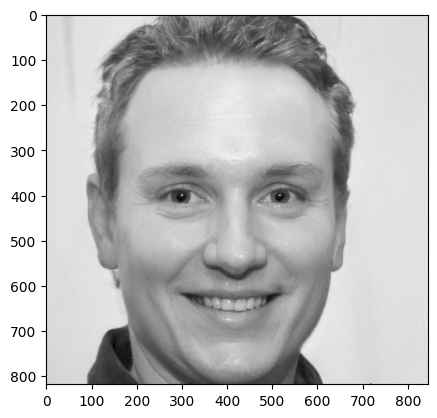

In [7]:
plt.imshow(image, cmap='gray')

In [10]:
# example from scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html
# the signal is a 2d image array`image`
# let's construct the filter  window, convolve and see fitlered result
# construct 2d hann window
win = signal.windows.hann(3)
win_2d = np.outer(win, win)

# normalize
win_2d = win_2d / win_2d.sum()


In [11]:
diff_y = np.array(
    [
        [-0.125, -0.250, -0.125], [0, 0, 0],  [0.125, 0.250, 0.125]
    ]
)
diff_x = np.array(
    [
        [-0.125, -0.250, -0.125], [0, 0, 0],  [0.125, 0.250, 0.125]
    ]
).T

In [32]:
diff_x

array([[-0.125,  0.   ,  0.125],
       [-0.25 ,  0.   ,  0.25 ],
       [-0.125,  0.   ,  0.125]])

In [ ]:
result_y = signal.convolve(image, diff_y, mode='same')
result_x = signal.convolve(image, diff_x, mode='same')
image_gradient = np.sqrt( result_x**2 + result_y**2 )


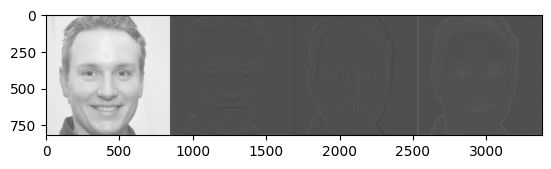

In [36]:
# aplt.subplot(1, 2)
result = np.hstack((image, result_y, result_x, image_gradient))
plt.imshow(result, cmap='gray')

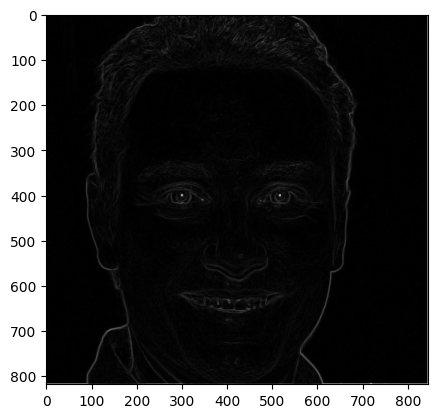

In [38]:
plt.imshow(image_gradient, cmap='gray')

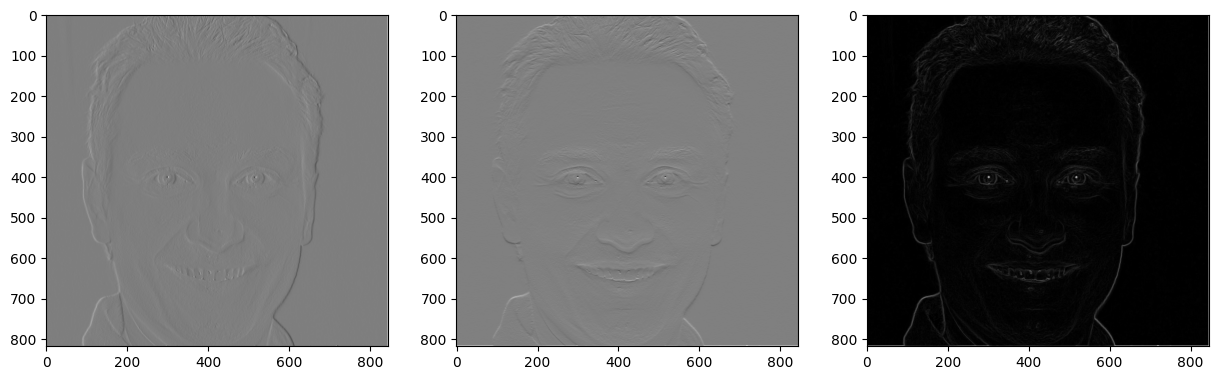

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(result_x, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(result_y, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(image_gradient, cmap='gray')

In [14]:
v1 = np.array(['a', 'b', 'c'],  dtype=object)
np.outer(v1, [1, 2, 3])

array([['a', 'aa', 'aaa'],
       ['b', 'bb', 'bbb'],
       ['c', 'cc', 'ccc']], dtype=object)

### let's achive the same result using opencv methods

In [ ]:
kernel_1 = np.ones((5,5), np.float32) / 25


array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

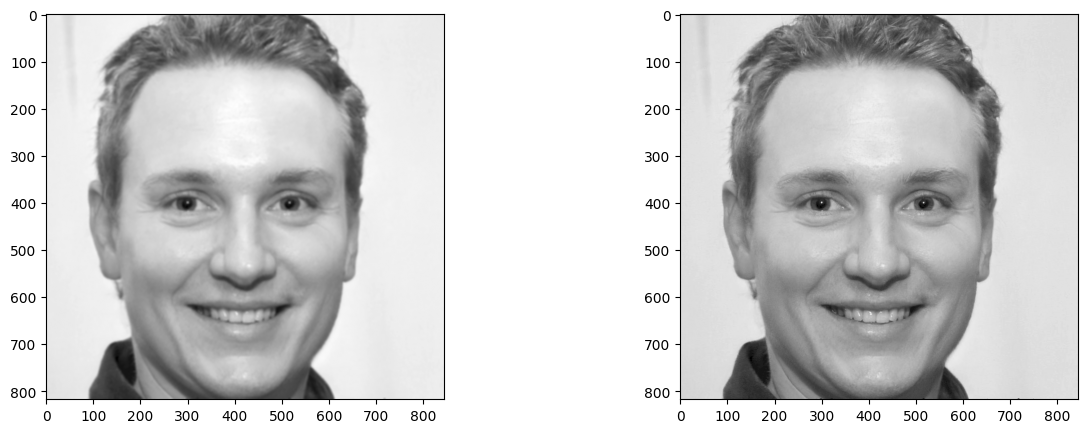

In [ ]:

res = cv.filter2D(image, -1, kernel_1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(res, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')



In [23]:
gaus_kernel =  cv.getGaussianKernel(5, 100)
gaus_kernel

array([[0.19998],
       [0.20001],
       [0.20002],
       [0.20001],
       [0.19998]])

### Gausian filter

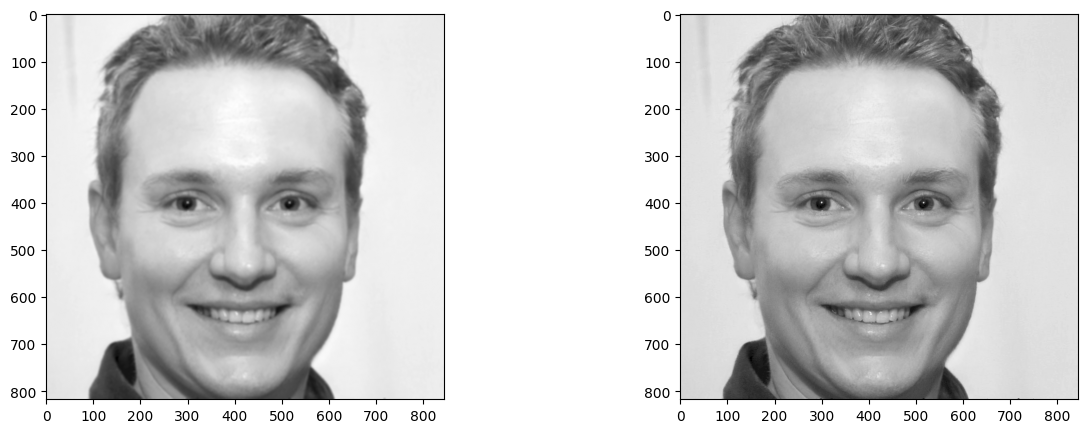

In [ ]:
blur = cv.GaussianBlur(image, (5,5), 0)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(blur, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')


#### Median Filter

In [ ]:
median = cv.medianBlur()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(blur, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')


In [60]:
def add_noise(img: np.ndarray, mean: int = 0, std_dev: int = 25) -> np.ndarray:
    image_float = img.astype(np.float32)
    noise = np.random.normal(mean, std_dev, img.shape).astype(np.float32)
    noisy_image = image_float + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image


def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

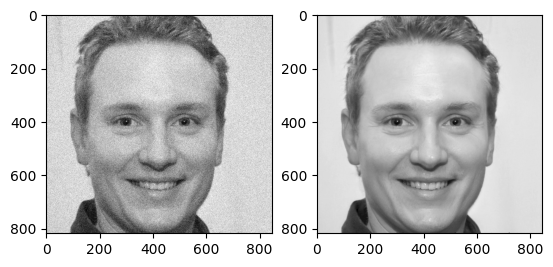

In [66]:

noisy = add_noise(image, std_dev=30)

plt.subplot(1, 2, 1)
plt.imshow(noisy, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')


In [39]:
image

array([[213, 213, 213, ..., 215, 215, 214],
       [213, 213, 213, ..., 215, 215, 214],
       [213, 213, 213, ..., 214, 214, 213],
       ...,
       [206, 206, 207, ..., 218, 218, 218],
       [206, 206, 206, ..., 218, 218, 218],
       [206, 206, 206, ..., 218, 218, 218]], shape=(818, 845), dtype=uint8)

### Median Filter

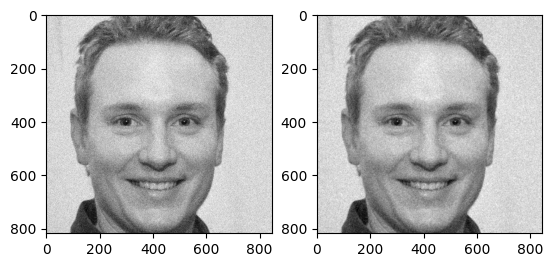

In [68]:
median = cv.medianBlur(noisy, 3)
plt.subplot(1, 2, 1)
plt.imshow(noisy, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(median, cmap='gray')


In [56]:
(image + np.random.normal(0, 30, image.shape)).astype(np.int32)

array([[218, 263, 196, ..., 248, 231, 187],
       [169, 215, 244, ..., 188, 203, 267],
       [185, 251, 234, ..., 223, 219, 233],
       ...,
       [196, 216, 193, ..., 209, 177, 200],
       [232, 259, 249, ..., 255, 165, 256],
       [246, 193, 192, ..., 227, 250, 234]], shape=(818, 845), dtype=int32)

### Bilateral filter

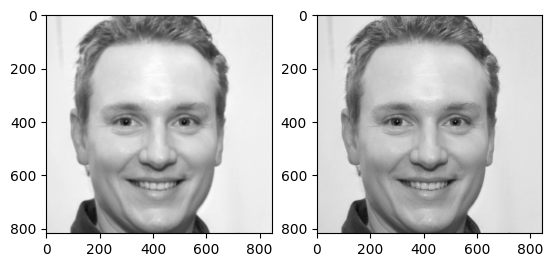

In [ ]:
blured = cv.blur(image, (8,8))
plt.subplot(1, 2, 1)
plt.imshow(blured, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')

In [ ]:
bilat = cv.bilateralFilter()